<a href="https://colab.research.google.com/github/cnyakundi/financial_inclusion/blob/master/notebooks/Bivariate_Analysis_with_Python_Week_2_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bivariate Analysis with Python - Week 2 IP

## Importing the Libraries 

This type of data involves two different variables. The analysis of this type of data deals with causes and relationships between two variables.

In [5]:
# Importing Numpy
import numpy as np

# Importing Pandas
import pandas as pd

# Importing Matplotlib
import matplotlib.pyplot as plt

# Importing Seaborn
import seaborn as sns

In [8]:
#loading our dataset 

df=pd.read_csv('Financial Dataset.csv')

## 1.0 Numerical and Numerical

## Cleaning our dataset 

In [14]:
# We can convert Cell Phone Access and gender of respondents into categories. This will reduce memory usage 

df['Has a Bank account'].fillna('0')


# df['Cell Phone Access']=df['Cell Phone Access'].astype('category')


df['gender_of_respondent']=df['gender_of_respondent'].astype('category')



#We convert country, unique_id, the relationship with head, marital status, level of education and type of job into strings 

df['year']=pd.to_datetime(df['year']) # Convert date to datetime 
df['country']=df['country'].astype('str')
df['uniqueid']=df['uniqueid'].astype('str')
df['uniqueid']=df['uniqueid'].astype('str')
df['The relathip with head']=df['The relathip with head'].astype('str')
df['marital_status']=df['marital_status'].astype('str')
df['Level of Educuation']=df['Level of Educuation'].astype('str')
df['Type of Job']=df['Type of Job'].astype('str')



# Replace yes and No with '1' amd '0' then cast into integers 

df.replace(to_replace=['Yes','No'],value=['1','0'], inplace=True)


df['Has a Bank account'].fillna('0', inplace=True)


df['Has a Bank account']=df['Has a Bank account'].astype('int')
df.replace(to_replace=['Yes','No'],value=['1','0'], inplace=True)

# Replace yes and No with '1' amd '0' then cast into integers

df['Cell Phone Access'].fillna('0', inplace=True)

df['Cell Phone Access']=df['Cell Phone Access'].astype('int')

# Converting Type of location into integers 

df.replace(to_replace=['Rural','Urban'],value=['0','1'], inplace=True)
df['Type of Location'].fillna('0', inplace=True)

df['Type of Location']=df['Type of Location'].astype('int')

# Dealing with the Missing Data
# df['Respondent Age']=df['Respondent Age'].fillna(df['Respondent Age'].mode())


# df.isnull().sum()


# We fill all these with 0 because many people dont have bank accounts, live in rural areas and dont have cell phone access

df['Has a Bank account'].fillna('0', inplace=True)

df['Type of Location'].fillna('0', inplace=True)

df['Cell Phone Access'].fillna('0', inplace=True)

df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,1970-01-01 00:00:00.000002018,uniqueid_1,1,0,1,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,1970-01-01 00:00:00.000002018,uniqueid_2,0,0,0,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,1970-01-01 00:00:00.000002018,uniqueid_3,1,1,1,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,1970-01-01 00:00:00.000002018,uniqueid_4,0,0,1,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,1970-01-01 00:00:00.000002018,uniqueid_5,0,1,0,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


### 1.01 Scatter Plots

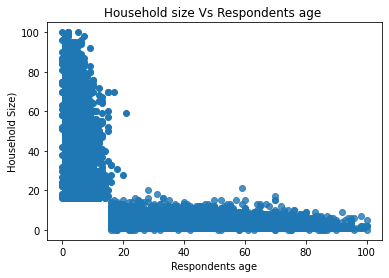

In [23]:


# Previewing our dataset
df.head()

# Using Pandas: Plotting our scatterplot to compare the variables
df.plot(x = 'household_size', y = 'Respondent Age', kind='scatter')

# Or Using Matplotlib: Plotting our scatterplot to compare the variables
plt.scatter(df["household_size"] , df["Respondent Age"])

# Or Using Seaborn: Using the function regplot to create our scatterplot
sns.regplot( x = df["Respondent Age"],y = df["household_size"], fit_reg=False)

# Giving our scatterplot a title
plt.title('Household size Vs Respondents age ')

# Labelling our x axis
plt.ylabel('Household Size)')

# Labelling our y axis
plt.xlabel('Respondents age')

# We then display our scatterplot as shown below
plt.show()

# The scatterplot graph shows that the household size and Respondents age are not  correlated 

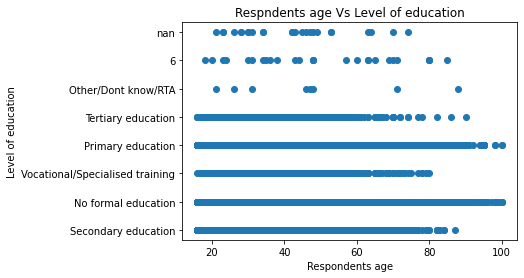

In [40]:



# Plotting our scatterplot
plt.scatter(df['Respondent Age'], df['Level of Educuation'])

# Giving our scatterplot a title
plt.title('Respndents age Vs Level of education')

# Labelling our x axis
plt.xlabel('Respondents age')

# Labelling our y axis
plt.ylabel('Level of education')

# Displaying our scatterplot
plt.show()

# There is no relation because the points are scattered throughout the graph.

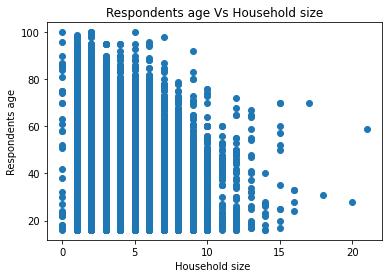

In [52]:



# Plotting our scatterplot
plt.scatter(df['household_size'],df['Respondent Age'])

# Giving our scatterplot a title
plt.title('Respondents age Vs Household size')

# Labelling our x axis
plt.xlabel('Household size ')

# Labelling our y axis
plt.ylabel('Respondents age')

# Displaying our scatterplot
plt.show()

# The variables show inverse relation. 

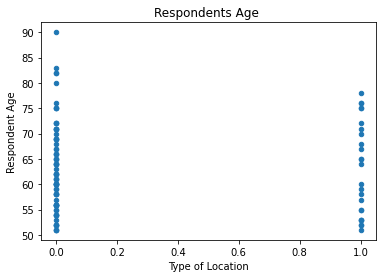

In [57]:


# Plotting our scatterplot
df[df['Respondent Age'] > 50].sample(100).plot.scatter(x='Type of Location', y='Respondent Age')

# Giving our scatterplot a title
plt.title('Respondents Age ')

# Displaying our scatterplot
plt.show()



### 1.02 Correlation

Correlation is a statistical measure that describes the association between random variables. In this section, will use pandas to calculate the correlation coefficient.

In [58]:



# Calculating the pearson coefficient
pearson_coeff = df['Respondent Age'].corr(df['household_size'], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = df['Respondent Age'].corr(df['household_size']) 
print(coeff)

#This confirmes there is a negative correlation 

-0.1197092971464233
-0.1197092971464233


In [61]:
# Calculating the pearson coefficient
df['Type of Location'].corr(df['household_size']) 

# Type of location and household size are negatively correlated 

-0.27408727753402057

In [62]:

df['Has a Bank account'].corr(df['Cell Phone Access']) 

#Low positive correlation which confirms that those with phones also have a bank account. 

0.20967215331950248

In [67]:

rural= df['Has a Bank account'].corr(df['Type of Location']==0)
urban=df['Has a Bank account'].corr(df['Type of Location']==0)


print(rural,urban)

# There is very weak positive correlation between those who have a bank account and where they live. 
# Those in Urban have bank accounts whereas those in rural areas show negative correlation 

-0.0879846895265603 -0.0879846895265603


In [68]:


# Calculating the pearson coefficient
df.corr() 

,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age
Has a Bank account,1.000000,0.087985,0.209672,-0.021694,0.019534
Type of Location,0.087985,1.000000,-0.083964,-0.274087,-0.047518
Cell Phone Access,0.209672,-0.083964,1.000000,0.099514,-0.103772
household_size,-0.021694,-0.274087,0.099514,1.000000,-0.119709
Respondent Age,0.019534,-0.047518,-0.103772,-0.119709,1.000000


## Categorical and Categorical

###  Stacked Column Chart

Stacked column charts work well when the focus of the chart is to compare the totals and one part of the totals. It
is a useful graph to visualize the relationship between two categorical variables. It compares the percentage that each category from one variable contributes to a total across categories of the second variable. 	

In [ ]:


df[['Has a Bank account', 'Type of Location',
       'Cell Phone Access']].plot(kind='bar', figsize=(8, 6), stacked=True)

# Rotating our x axis ticks
plt.xticks(rotation = 45)

# Giving our chart a title
plt.title("Sales of Hybrid, Racing and Electric Bikes (May 2017 - May 18)", fontsize=14, y=1.015)

# Labeling our y axis
plt.ylabel("Sales", fontsize=14, labelpad=15)

# Labeling our x axis
plt.xlabel("Months", fontsize=14, labelpad=15)

# Displaying our chart
plt.show()

## Categorical and Numerical

### Line Charts

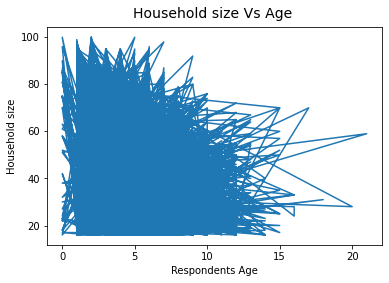

In [82]:


# Plotting our line graph
plt.plot(df['household_size'], df['Respondent Age'])

# Giving a title to our line graph
plt.title("Household size Vs Age ", fontsize=14, y=1.015)

# Labelling the y-axis
plt.ylabel('Household size')

# Labelling the x-axis
plt.xlabel('Respondents Age')

# Displaying our graph
plt.show()




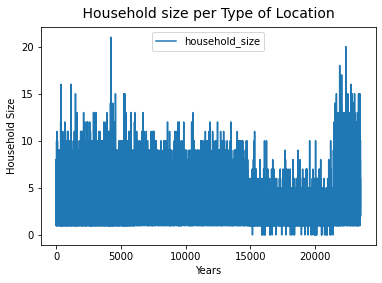

In [85]:



# Plotting our line graph
df[["household_size"]].plot()

# Giving a title to our line graph
plt.title(" Household size per Type of Location ", fontsize=14, y=1.015)

# Labelling the y-axis
plt.ylabel('Household Size')

# Labelling the x-axis
plt.xlabel('Years')

# Displaying our graph
plt.show()

###  Z-test 

In [86]:

#
from scipy import stats

a = np.array([df['Respondent Age']])
stats.zscore(a)

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


array([[nan, nan, nan, ..., nan, nan, nan]])